# Master file with exp_name:

In [1]:
# import pandas library:
import os
import pandas as pd
import pylab as pyl
import numpy as np
from scipy.interpolate import *
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pretty dataframe :
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Control variables: 


# master dataset location:
master_location = 'Dropbox/gits/data/ThOpt/clean_csv/'

# master file name : 
#file_name = 'ex4_EDData.csv'
#file_name_med = 'ex2_enDataSG_2T.csv'
#file_name_large = 'ex2_enDataSG_1T.csv'

# Functions:

In [4]:
def change_type(df, col, dtype):
    # This function change the column datatype
    # df - main data frame - type: dataframe
    # col - columns that you want to change data type - type: list
    # dtype - new column type - type: list
    # col and dtype must be equal in length

    if len(col) != len(dtype):
        print("col and dtype must be equal")
        return df
    for col,n_type in zip(col,dtype):
        df[col] = df[col].astype(n_type)

    return df

In [5]:
def find_unique_transfers(df, 
                          args = ['file_size','number_of_files','bandwidth','rtt','buffer_size']):
    # find unique transfers:
    # df - main dataframe
    # args - list of columns you want for uniqueness

    # get the unique transfers : as tuple 
    transfer_requests = df[args]
    droped_duplicate_trans_req = transfer_requests.drop_duplicates()

    unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
    return unique_transfers

In [6]:
def plot_runs_1D(df, bk_tr, runs,colors,sort_order):
    # This function plots runs
    # df - main dataframe, type: dataframe
    # bk_tr - background traffic type
    # runs - list of runs you want to plot, type: List
    # colors - list of colors for the graphs
    # length of colors must be equal to (bk_tr X runs)
    # sort_order - order of params, type: list. (for example 'p-cc-pp','pp-cc-p')
    # 
    
    if len(colors) != (len(bk_tr) * len(runs)) :
        print("length of colors must be equal to (bk_tr X runs)")
        return
    
    
    plt.figure(figsize=(35,13))
    
    df = df.sort(sort_order)
    x_label = 'Parameter order - ' + sort_order[0] +', '+ sort_order[1] + ', ' + sort_order[2]
    plt.xlabel(x_label, fontsize=40)
    plt.ylabel('Throughput (Gbps)', fontsize=40)
    title = 'Throughput Trajectory(4) - Parameter order - '+ sort_order[0] +', '+ sort_order[1] + ', ' + sort_order[2]
    plt.title(title, fontsize=50)

    #df = df.sort(['cc','p','pp'])
    color_count = 0
    for bk in bk_tr:
        bk_data = df[df.background == bk]
        for run in runs:
            run_data = bk_data[bk_data.run_id == run]
            num_rows = run_data.shape[0]
            #df_list.append(run_data)
            run_data['ticks'] = run_data[sort_order[0]].astype(str) + '-' \
                                + run_data[sort_order[1]].astype(str) + '-' \
                                + run_data[sort_order[2]].astype(str)


            x_value = np.arange(1,num_rows+1)
            x_value
            y_value = np.array(run_data.throughput)
            y_value.shape
            tick_value = np.array(run_data.ticks)

            plt.xticks(x_value[0:(num_rows+1):32], tick_value[0:(num_rows+1):32])
            plt.tick_params(axis='both', which='major', labelsize=30)

            plt.plot(x_value, y_value,colors[color_count],)
            color_count = color_count + 1
    plt.show()

# Read and merge data files:

In [7]:
!ls ~/Dropbox/gits/data/ThOpt/clean_csv/

ex1_sg0.25-1M.csv   ex1_sg5-25M.csv     ex2_enDataSb_1T.csv ex4_EDData.csv
ex1_sg100M.csv      ex2_enDataSG.csv    ex3_SBData.csv
ex1_sg1G.csv        ex2_enDataSG_1T.csv ex3_SGData.csv
ex1_sg3G.csv        ex2_enDataSG_2T.csv ex4_BTData.csv


In [8]:
# required values :

# OS file seperator: 
file_seperator = os.sep


# User OS home directory:
user_home = os.environ['HOME']
user_home = user_home+file_seperator
#user_home

In [9]:
log_files_path = user_home + master_location
list_of_logs = os.listdir(log_files_path)
list_of_logs

['ex1_sg0.25-1M.csv',
 'ex1_sg100M.csv',
 'ex1_sg1G.csv',
 'ex1_sg3G.csv',
 'ex1_sg5-25M.csv',
 'ex2_enDataSG.csv',
 'ex2_enDataSG_1T.csv',
 'ex2_enDataSG_2T.csv',
 'ex2_enDataSb_1T.csv',
 'ex3_SBData.csv',
 'ex3_SGData.csv',
 'ex4_BTData.csv',
 'ex4_EDData.csv']

In [10]:
file_list = []
for file_path in list_of_logs:
    print(file_path)
    url = user_home + master_location + file_path
    temp_data = pd.read_csv(url)
    
    file_list.append(temp_data)
data = pd.concat(file_list, ignore_index=True) 
data.shape

ex1_sg0.25-1M.csv
ex1_sg100M.csv
ex1_sg1G.csv
ex1_sg3G.csv
ex1_sg5-25M.csv
ex2_enDataSG.csv
ex2_enDataSG_1T.csv
ex2_enDataSG_2T.csv
ex2_enDataSb_1T.csv
ex3_SBData.csv
ex3_SGData.csv
ex4_BTData.csv
ex4_EDData.csv


(92583, 18)

In [11]:
# See all the experiments:
data.exp_name.unique()

array(['exp_1', 'exp_2_background_traffic', 'exp_3_engin', 'exp_3_kemal',
       'exp_4_BT', 'exp_4_ED'], dtype=object)

In [12]:
data["destination"] = data["destination"].replace(['Gordon/oasis','Gordon'],'Gordon/Oasis')
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time_needed,date,time,source,destination,run_id,background,exp_name
0,256069,1000,10000,0.04,33554432,1,1,1,1,53.622316,36.433726,11/13/14,07:36.2,Stampede,Gordon/Oasis,1,0,exp_1
1,256069,1000,10000,0.04,33554432,1,1,1,0,65.436956,29.855622,11/13/14,08:12.7,Stampede,Gordon/Oasis,1,0,exp_1
2,256069,1000,10000,0.04,33554432,1,1,2,1,94.712707,20.627214,11/13/14,08:42.5,Stampede,Gordon/Oasis,1,0,exp_1
3,256069,1000,10000,0.04,33554432,1,1,2,0,100.561361,19.427579,11/13/14,09:03.1,Stampede,Gordon/Oasis,1,0,exp_1
4,256069,1000,10000,0.04,33554432,1,1,4,1,159.132638,12.276979,11/13/14,09:22.6,Stampede,Gordon/Oasis,1,0,exp_1


In [16]:
# Get the sources:
data["source"].unique()

array(['Stampede', 'Blacklight', 'Evenstar'], dtype=object)

In [17]:
# Get the destinations:
data['destination'].unique()

array(['Gordon/Oasis', 'Blacklight', 'Trestles', 'Didclab-ws10'], dtype=object)

In [19]:
small = data[(data.exp_name == 'exp_1')]

In [20]:
uf = find_unique_transfers(small)
uf

[(256069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048641.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048672.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048656.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048640.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (104857664.0, 64.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1073742080.0, 16.0, 10000.0, 0.040000000000000001, 33554432.0),
 (3221225984.0, 8.0, 10000.0, 0.040000000000000001, 33554432.0),
 (5242929.0, 1000.0, 10000.0, 0.040000000

In [22]:
small = small.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])

In [24]:
c = small.loc([(512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0)])

AttributeError: '_LocIndexer' object has no attribute 'head'

In [13]:
find_unique_transfers(data)

[(256069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (256072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512069.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512096.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512080.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (512072.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048641.0, 1000.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048672.0, 128.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048656.0, 256.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1048640.0, 512.0, 10000.0, 0.040000000000000001, 33554432.0),
 (104857664.0, 64.0, 10000.0, 0.040000000000000001, 33554432.0),
 (1073742080.0, 16.0, 10000.0, 0.040000000000000001, 33554432.0),
 (3221225984.0, 8.0, 10000.0, 0.040000000000000001, 33554432.0),
 (5242929.0, 1000.0, 10000.0, 0.040000000

# Get exp_2 data:

In [14]:
exp_2 = data[data.exp_name == "exp_2_background_traffic"]

/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/mds/anaconda/envs/deep_learning/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


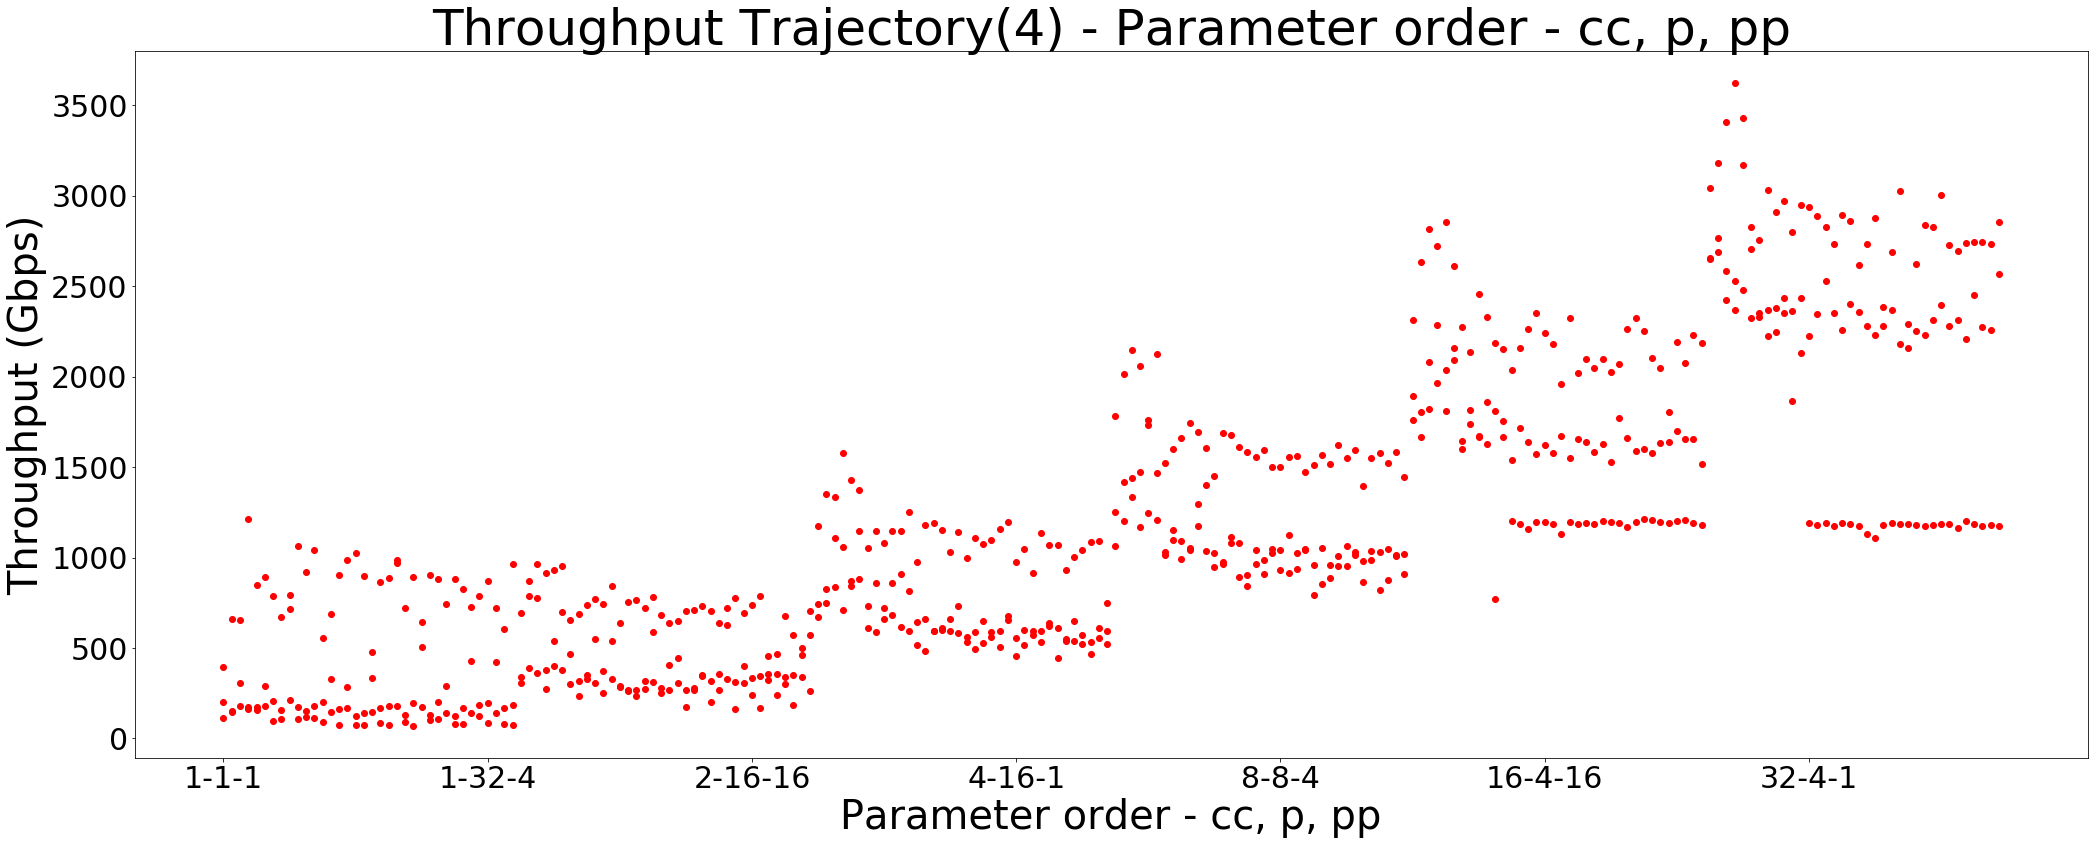

In [15]:
# get the small data and only transfer from gordon and stampede:
temp_exp2 = change_type(exp_2, ["file_size"], ["int"])
exp_2_small = temp_exp2[(temp_exp2.file_size < 10000000) & (temp_exp2.destination == 'Gordon/Oasis') ] 

bk_traffic = [0,1,2]
runs = [2]
colors = ['ro','ro','ro']
sort_order = ['cc','p','pp']
plot_runs_1D(exp_2_small,bk_traffic,runs,colors, sort_order)

# Get all data and perform CNN:

In [ ]:
temp_data = data.copy(deep=True)

In [ ]:
args = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size','source', 'destination','run_id', 'background']
unique_req = find_unique_transfers(temp_data, args)
num_reqs = len(find_unique_transfers(temp_data, args))

In [ ]:
temp_data = temp_data.set_index(args)
temp_data.head()

## Make Ndarray for CNN:

In [ ]:
# make each request a matrix of ndarray 
# with all requests make 264 * 32 * 32 matrix
m = 32
n = 32
x = num_reqs

mat = np.zeros([x,m+1,n+1])
mat_y = np.zeros(x)
req_count = 0
for req in unique_req:
    current_req = temp_data.loc[req]
    current_req = current_req.reset_index()
    for index, row in current_req.iterrows():
        mat[req_count, row.p, row.cc] = row.throughput
        run_id = row.run_id
    mat_y[req_count] = run_id
    req_count = req_count + 1
        

# Core CNN code:

In [ ]:

import theano 
import warnings

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
# split data for training and testing: 
training_idx = np.random.randint(mat.shape[0], size=220)
test_idx = np.random.randint(mat.shape[0], size=44)
X_train, X_test = mat[training_idx,:], mat[test_idx,:]
y_train = mat_y[training_idx]
y_test = mat_y[test_idx]

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, 33, 33)
X_test = X_test.reshape(X_test.shape[0], 1, 33, 33)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
Y_train = np_utils.to_categorical(y_train, 12)
Y_test = np_utils.to_categorical(y_test, 12)

In [ ]:
# 7. Define model architecture
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,33,33), 
                        dim_ordering='th'))
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.summary()

In [ ]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=400, verbose=1)

In [ ]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
score

In [ ]:
suffled_data = data.sample(frac=1)

In [ ]:
suffled_data.reset_index(drop=True)

In [ ]:
del suffled_data["run_id"]

In [ ]:
del suffled_data["fast"]

In [ ]:
suffled_data.head()

In [ ]:
suffled_data.to_csv("logs_mixed_traffic_3runs.csv",index=False)